# Dropout
* 드롭아웃(Dropout) 기법은 2014년도에 나온 논문이다.
* 논문 제목 : Dropout: A Simple Way to Prevent Neural Networks from Overfitting  
* 논문 발표 시점 : 2014년  
* 논문 링크 : [논문 주소](https://jmlr.org/papers/v15/srivastava14a.html)

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

fashion_mnist = keras.datasets.fashion_mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

dropout의 확률을 9.0로 주었을 경우의 결과

In [10]:
model = keras.Sequential([
    keras.layers.Input(shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.9),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3744 - loss: 1.6616
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5137 - loss: 1.1989
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5342 - loss: 1.1461
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5517 - loss: 1.1035
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5601 - loss: 1.0814


dropout 이 없을 경우 5 에폭만에 Accuracy 가 높아진다

In [6]:
model = keras.Sequential([
    keras.layers.Input(shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    # keras.layers.Dropout(0.9),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7831 - loss: 0.6275
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8622 - loss: 0.3883
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8768 - loss: 0.3428
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8859 - loss: 0.3130
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8885 - loss: 0.2965


### overfitting

In [11]:
X_train, X_valid, y_train, y_valid = train_test_split(train_images, train_labels, test_size=0.01, random_state=101)
X_train = X_train / 255.0
X_valid = X_valid / 255.0

# Dense layer만으로 만들어 낸 classification 모델입니다.
model = keras.Sequential([
    keras.layers.Input(shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=200, batch_size=512, validation_data=(X_valid, y_valid))

Epoch 1/200
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4539 - loss: 2.1974 - val_accuracy: 0.5667 - val_loss: 1.6107
Epoch 2/200
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5916 - loss: 1.4854 - val_accuracy: 0.6767 - val_loss: 1.1429
Epoch 3/200
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6683 - loss: 1.0978 - val_accuracy: 0.7233 - val_loss: 0.9246
Epoch 4/200
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7187 - loss: 0.9000 - val_accuracy: 0.7450 - val_loss: 0.8009
Epoch 5/200
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7343 - loss: 0.7978 - val_accuracy: 0.7683 - val_loss: 0.7264
Epoch 6/200
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7471 - loss: 0.7293 - val_accuracy: 0.7750 - val_loss: 0.6795
Epoch 7/200
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7577 - loss: 0.6815 - val_accuracy: 0.7833 - val_loss: 0.6461
Epoch 8/200
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7650 - loss: 0.6539 - val_accu

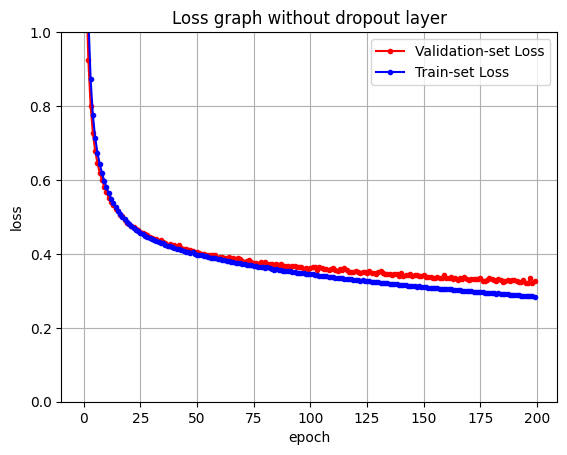

In [14]:
# loss 시각화
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.title('Loss graph without dropout layer') 
plt.ylim(0,1)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

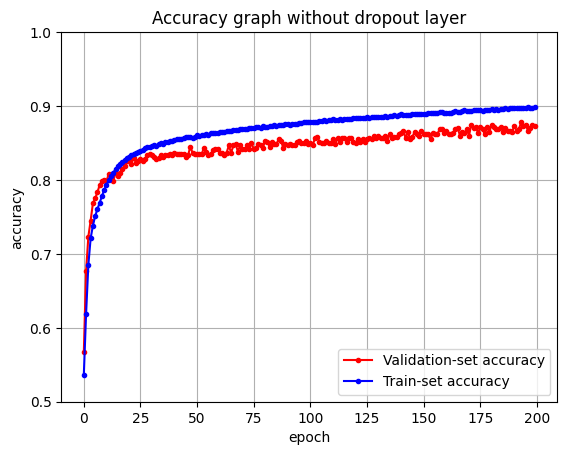

In [15]:
# accuracy 시각화
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accuracy graph without dropout layer') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

dropout layer가 없는 fully connected layer에서 200번 정도의 학습에서는 train set accuracy, loss는 좋아졌다.  
하지만 validation set의 accuracy와 loss는 어느 정도 값에서 수렴함을 볼 수 있다.

In [22]:
model = keras.Sequential([
    keras.layers.Input(shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history = model.fit(x=X_train, y=y_train, batch_size=512, epochs=200, validation_data=(X_valid, y_valid))

Epoch 1/200
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3765 - loss: 2.2138 - val_accuracy: 0.5933 - val_loss: 1.7017
Epoch 2/200
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5444 - loss: 1.5911 - val_accuracy: 0.6050 - val_loss: 1.2407
Epoch 3/200
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5978 - loss: 1.2265 - val_accuracy: 0.6933 - val_loss: 1.0247
Epoch 4/200
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6556 - loss: 1.0381 - val_accuracy: 0.7450 - val_loss: 0.8927
Epoch 5/200
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6864 - loss: 0.9204 - val_accuracy: 0.7583 - val_loss: 0.8048
Epoch 6/200
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7040 - loss: 0.8483 - val_accuracy: 0.7600 - val_loss: 0.7466
Epoch 7/200
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7173 - loss: 0.7982 - val_accuracy: 0.7683 - val_loss: 0.7032
Epoch 8/200
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7311 - loss: 0.7613 - val_accu

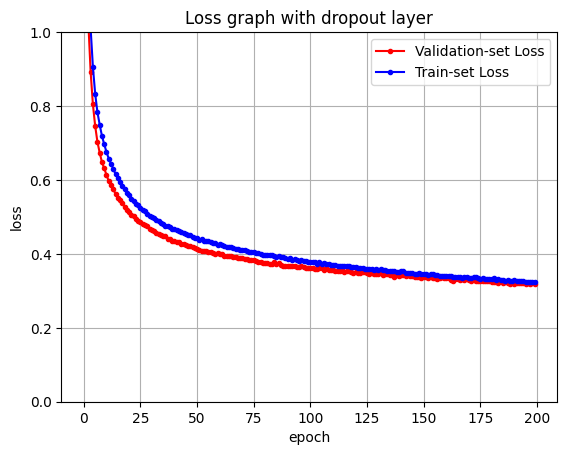

In [25]:
# loss 시각화

loss = history.history["loss"]
val_loss = history.history["val_loss"]
x_len = range(len(loss))

plt.plot(x_len, val_loss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph with dropout layer') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

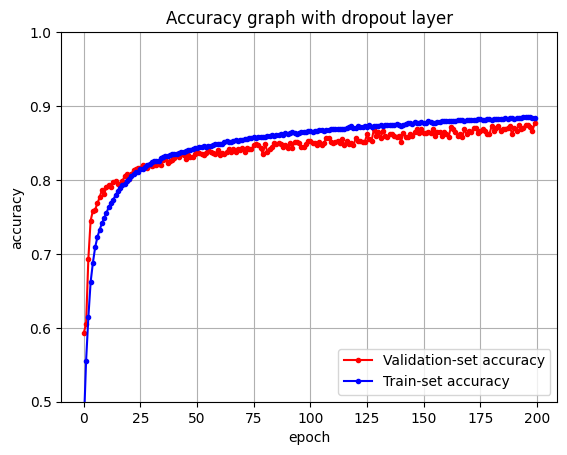

In [26]:
# accuracy 시각화

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

plt.plot(x_len, val_accuracy, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, accuracy, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accuracy graph with dropout layer') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()